In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
df = pd.read_csv('drive/MyDrive/Colab_Notebooks/Data Analysis Bootcamp/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
integers = ["minimum_nights", "number_of_reviews", "availability_365"]
for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")
  max_value = (3*df[column].std()) + df[column].mean()
  min_value = -(3*df[column].std()) + df[column].mean()
  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()
  if mean is not np.nan:
    df.loc[(df[column] > min_value)]
    df.fillna(mean, inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)
  df[column]=df[column].astype("int64")

In [7]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude","longitude"]
for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")
  max_value = (3*df[column].std()) + df[column].mean()
  min_value = -(3*df[column].std()) + df[column].mean()
  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()
  if mean is not np.nan:
    df.loc[(df[column] > min_value)]
    df.fillna(mean, inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)
  df[column]=df[column].astype("float64")

In [8]:
df.drop(['id','host_id'], axis=1,inplace=True)

In [9]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,2.302776,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,2.362699,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,4.490000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  float64
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [11]:
df.isnull().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
print(df['neighbourhood_group'].nunique())
print(df['neighbourhood_group'].unique())
print(df['neighbourhood_group'].value_counts())

5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Text(0.5, 1.0, 'Class Frequencies of Neighbourhood Group Variable')

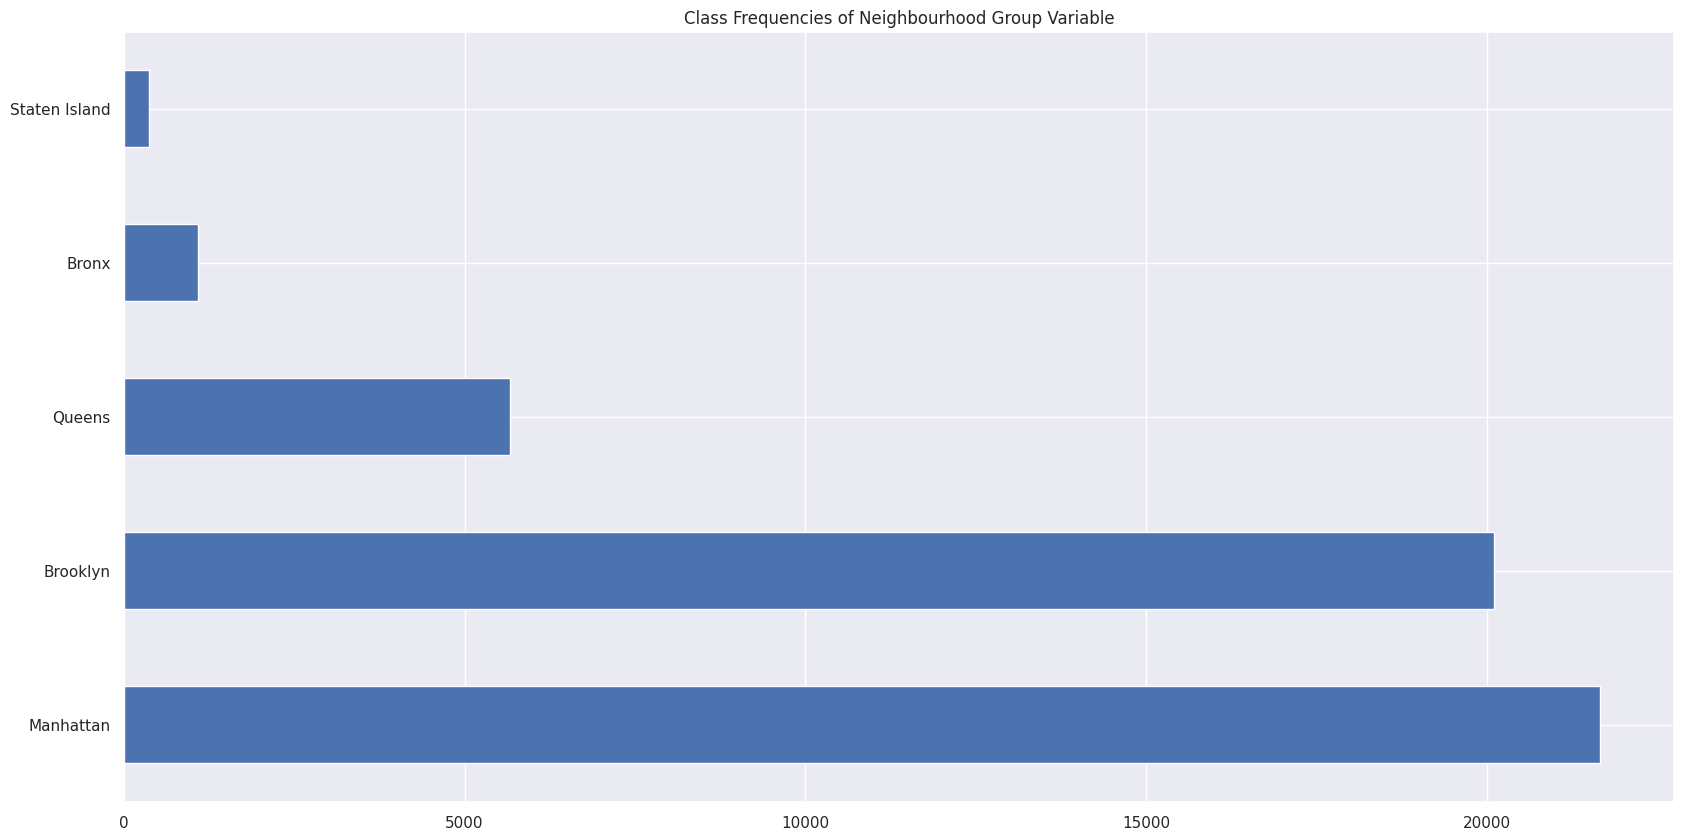

In [13]:
df['neighbourhood_group'].value_counts().plot.barh().set_title("Class Frequencies of Neighbourhood Group Variable")

Text(0.5, 1.0, 'Neighbourhood Group Frequency')

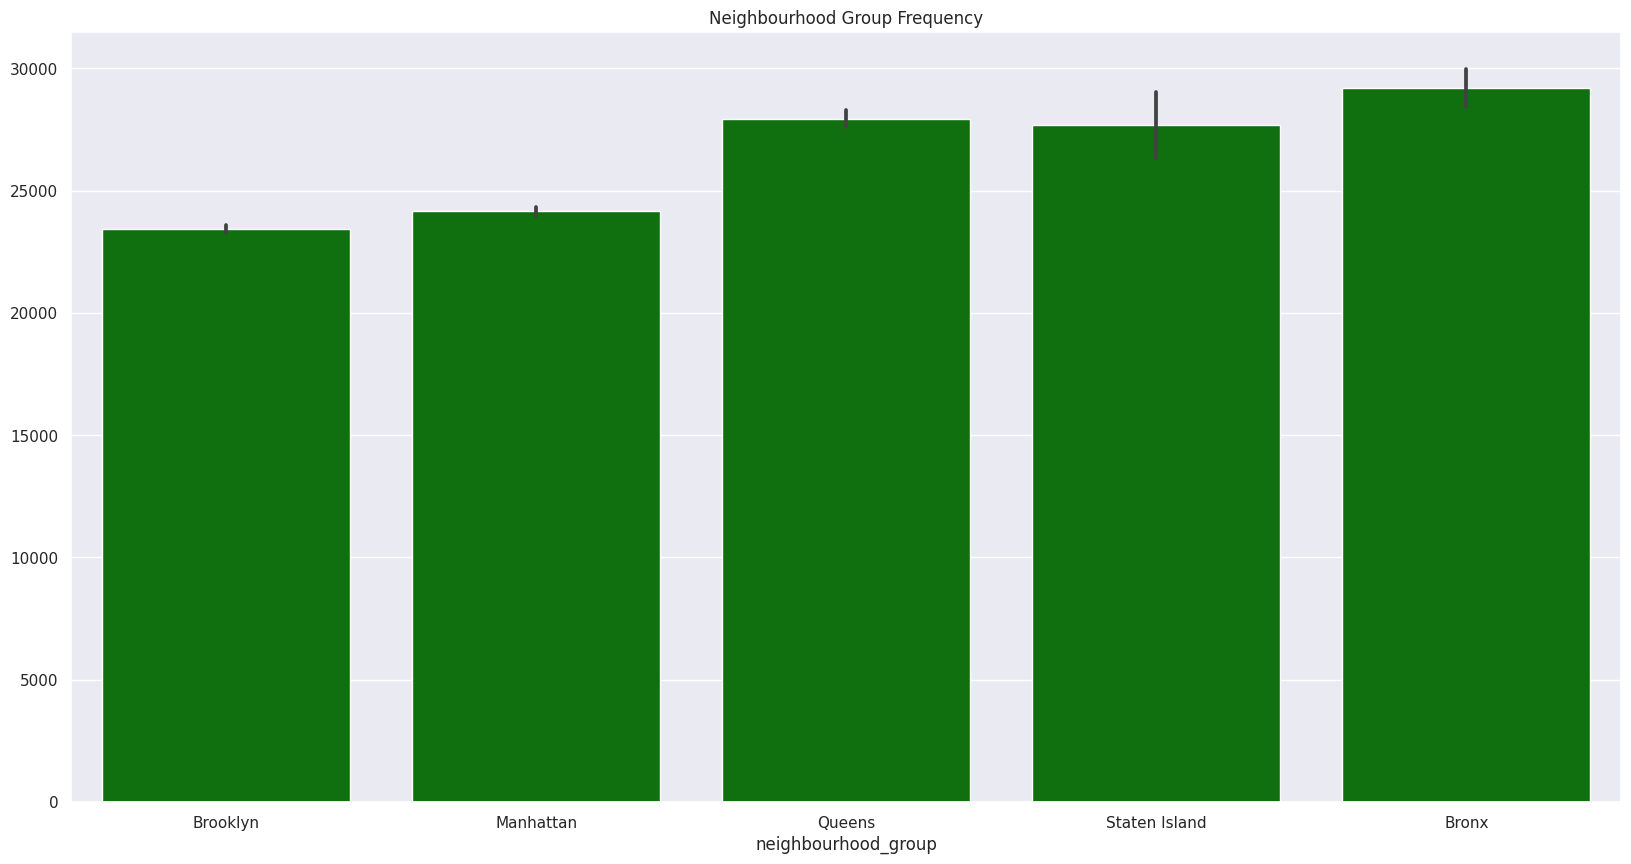

In [14]:
sns.barplot(x="neighbourhood_group", y=df["neighbourhood_group"].index, data=df, color="green").set_title("Neighbourhood Group Frequency")

In [15]:
print(df['room_type'].nunique())
print(df['room_type'].unique())
print(df['room_type'].value_counts())

3
['Private room' 'Entire home/apt' 'Shared room']
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


Text(0.5, 1.0, 'Class Frequencies of Room Type Variable')

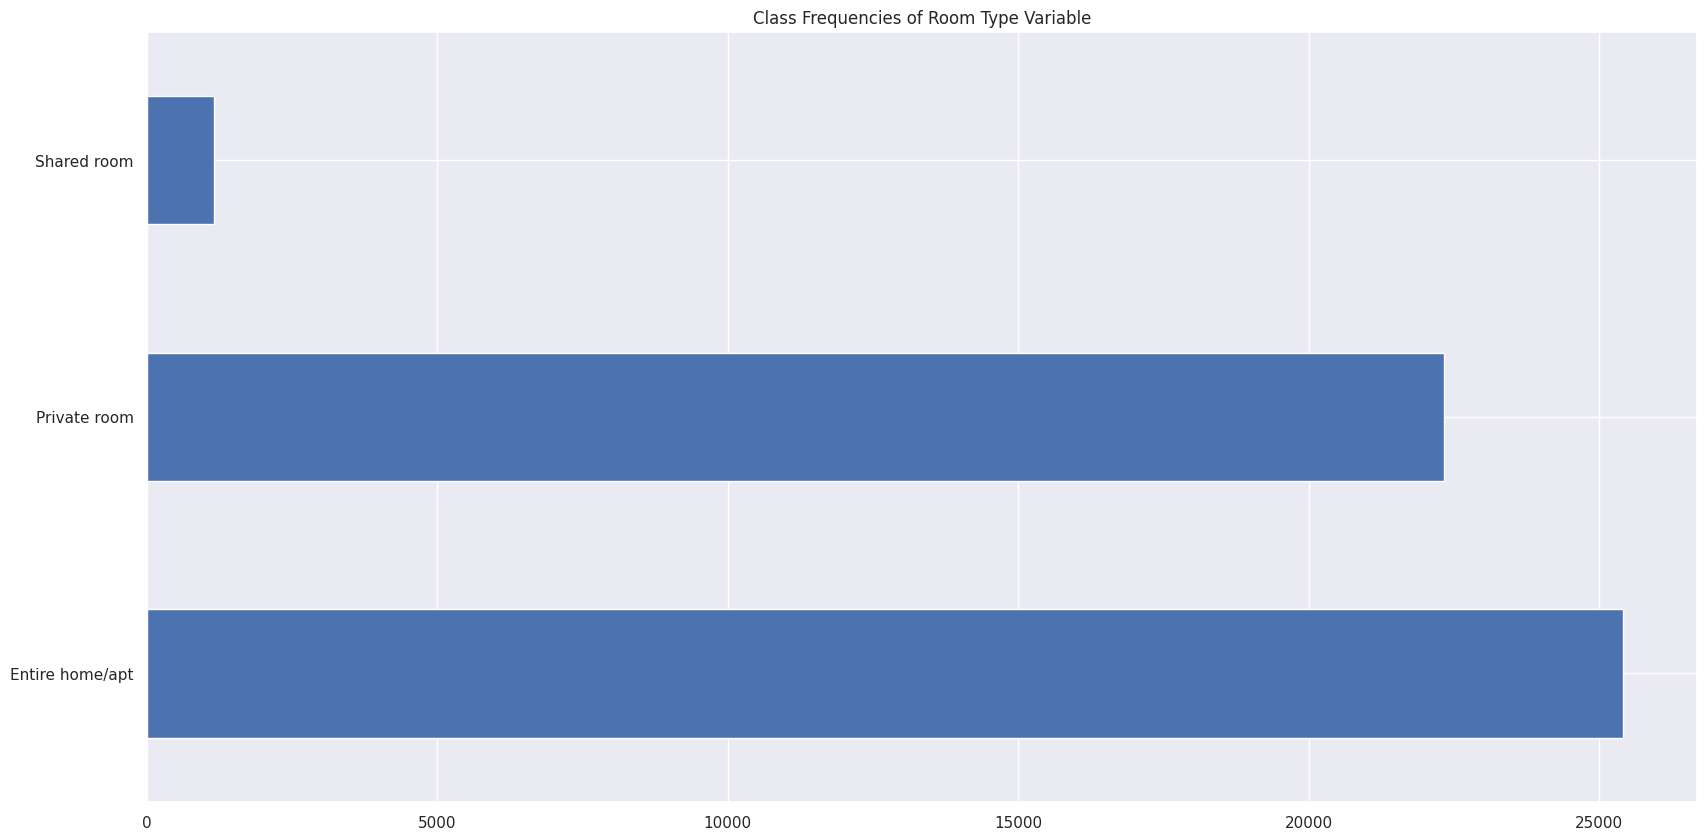

In [16]:
df['room_type'].value_counts().plot.barh().set_title("Class Frequencies of Room Type Variable")

Text(0.5, 1.0, 'Room Type Group Frequency')

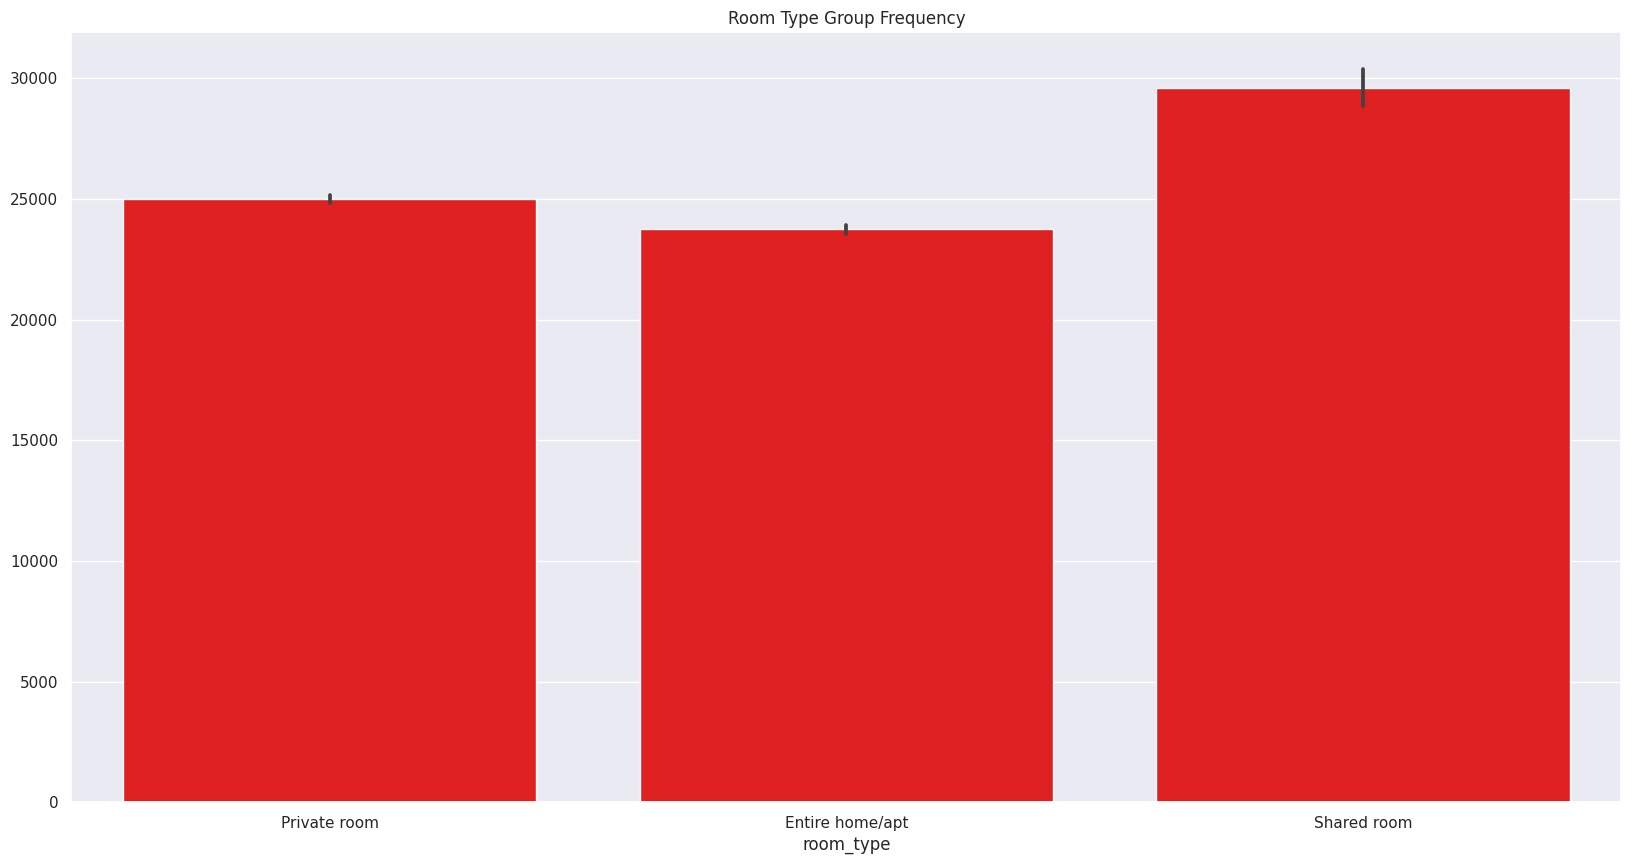

In [17]:
sns.barplot(x="room_type", y=df["room_type"].index, data=df, color="red").set_title("Room Type Group Frequency")

Text(0.5, 1.0, 'Neighbourhood Group - Price - Room Type')

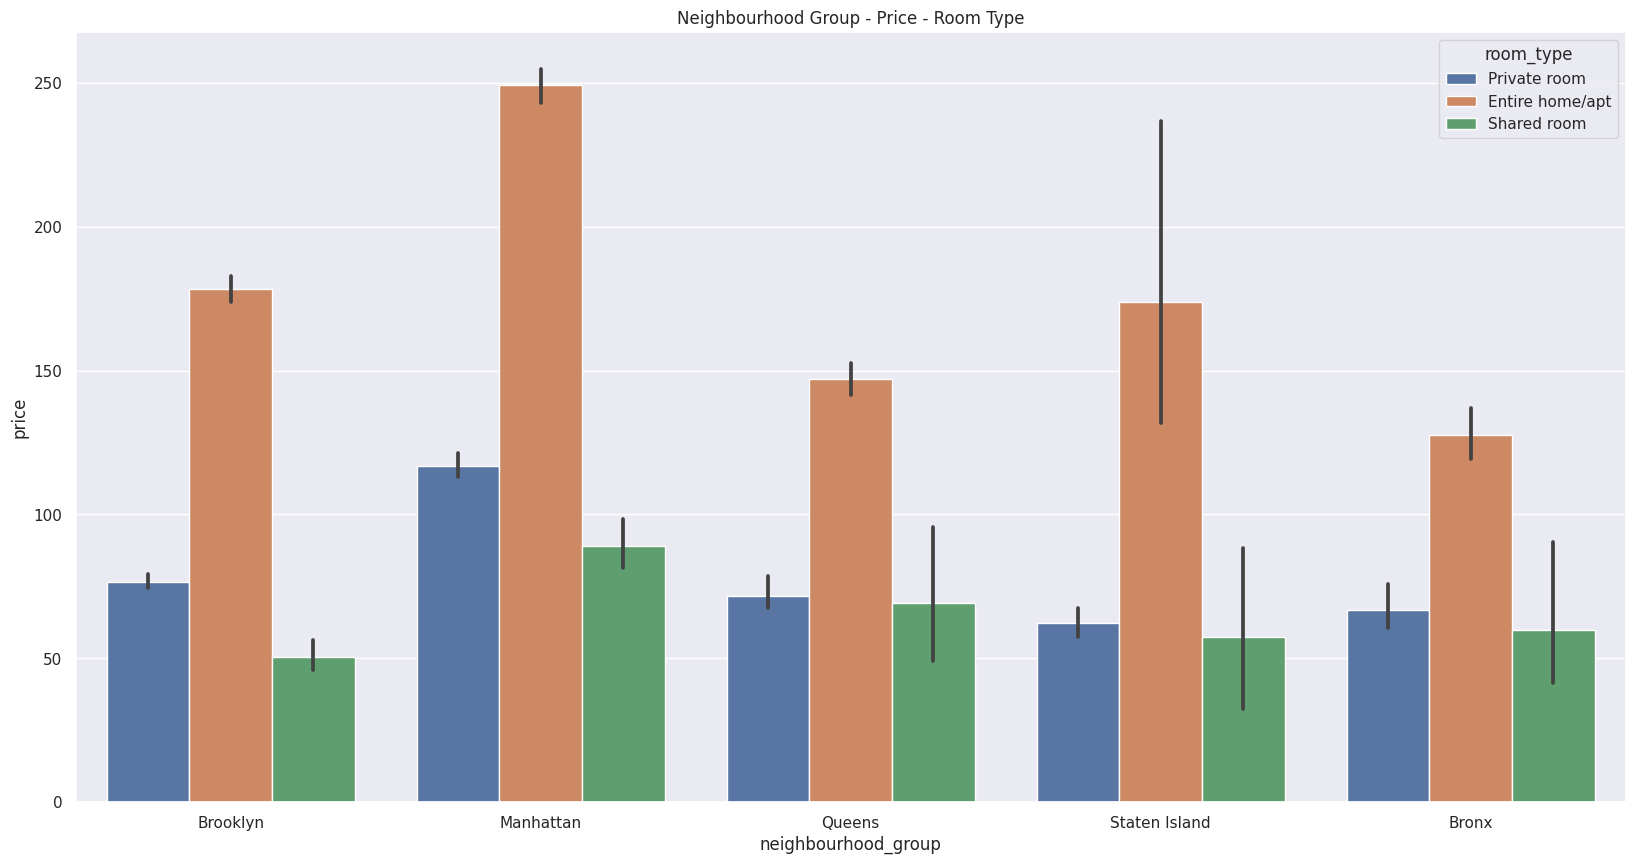

In [18]:
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df)
plt.title("Neighbourhood Group - Price - Room Type")

<ipython-input-19-157b2b154f9d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

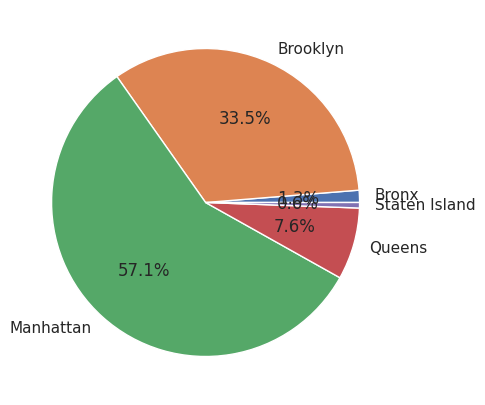

In [19]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

<ipython-input-20-57a524987454>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

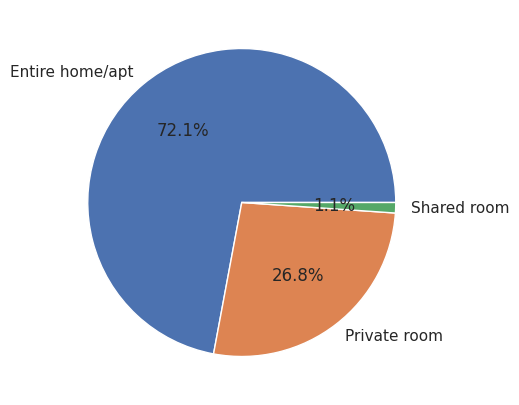

In [20]:
df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

<Axes: xlabel='price', ylabel='Count'>

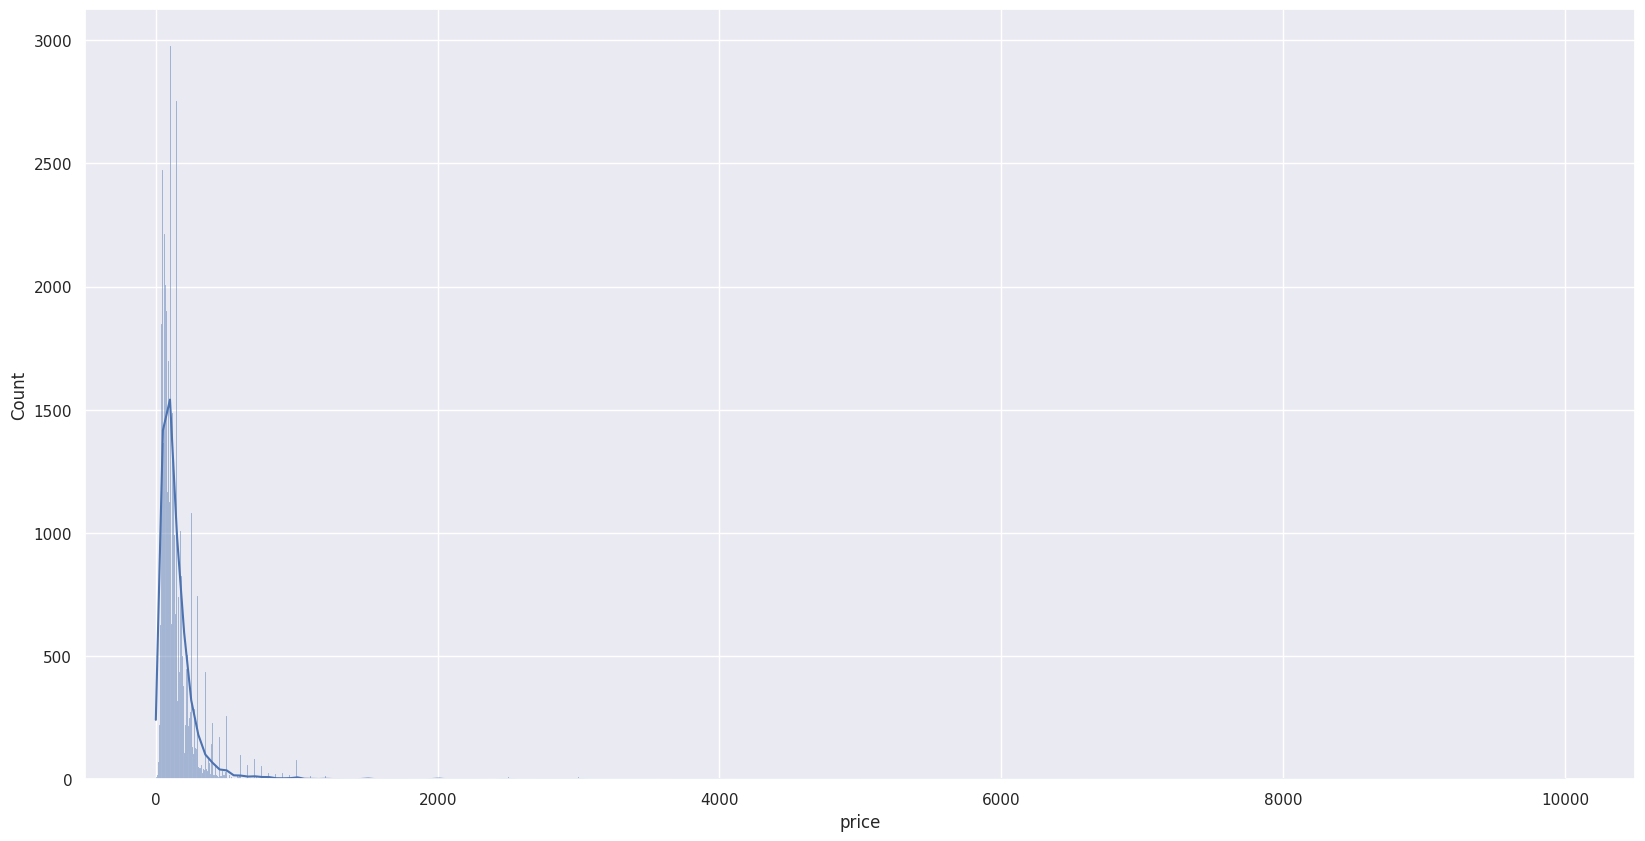

In [21]:
sns.histplot(df["price"], kde=True)

<Axes: xlabel='price', ylabel='Count'>

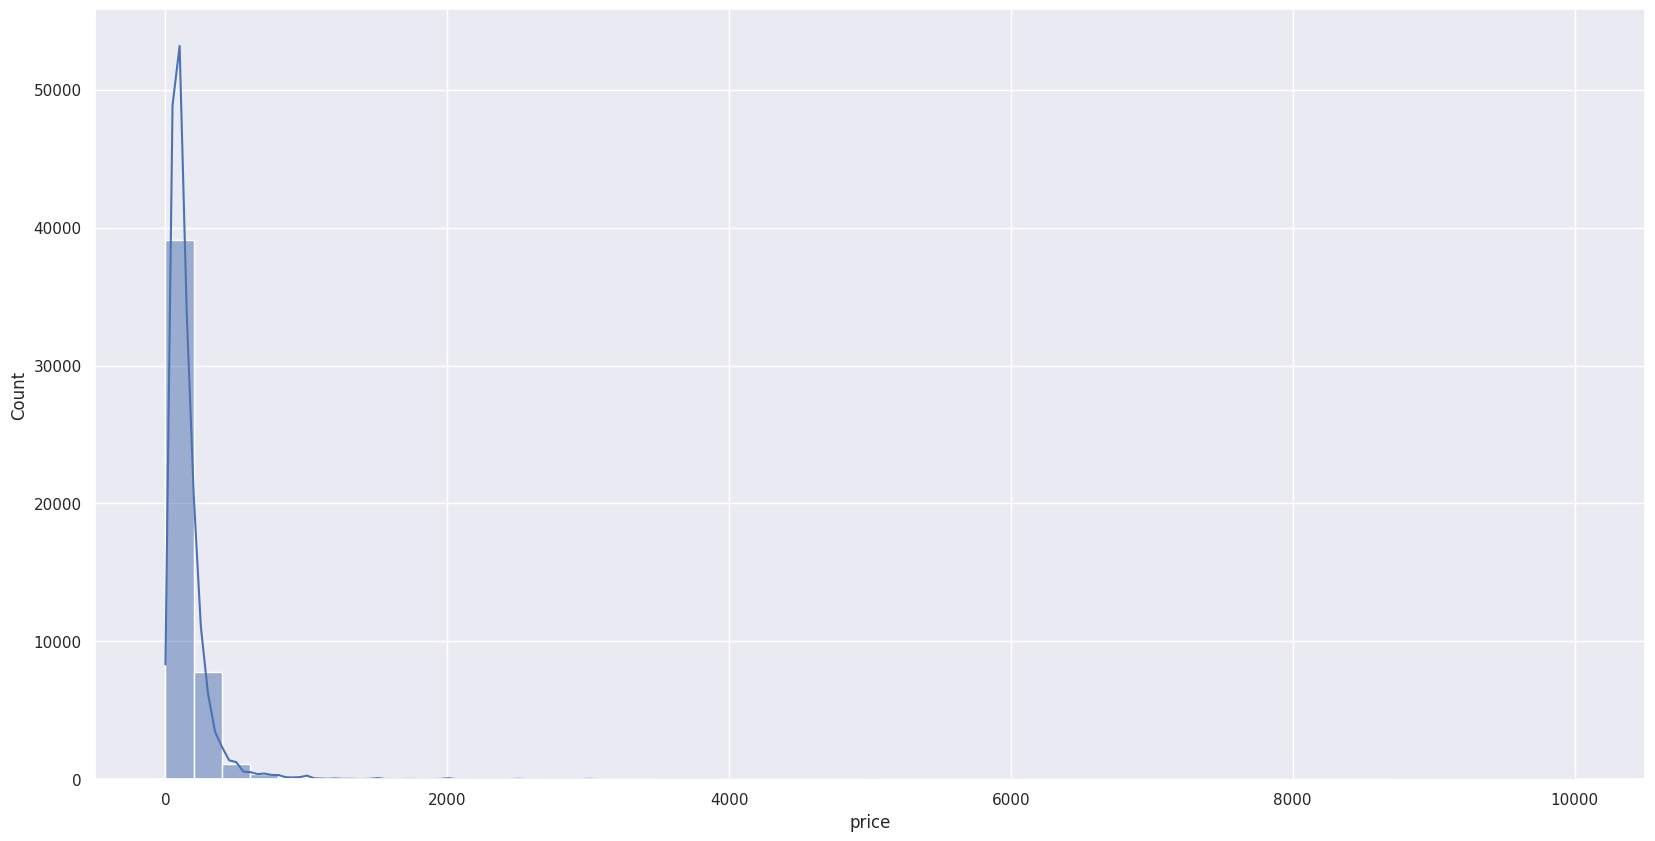

In [22]:
sns.histplot(df["price"], kde=True, bins=50)

<Axes: xlabel='price', ylabel='Density'>

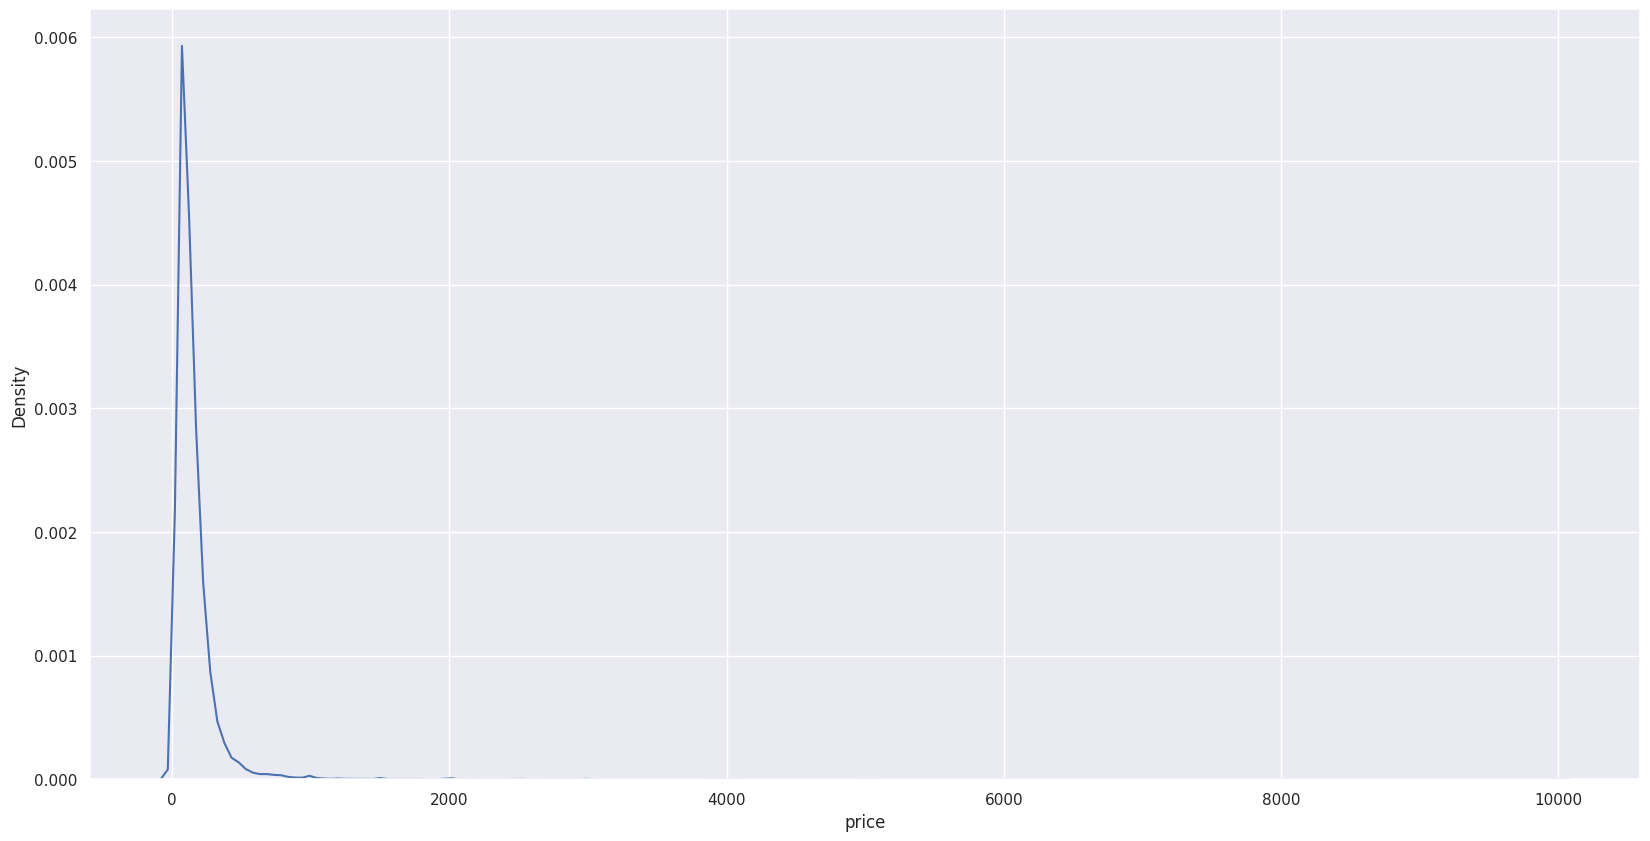

In [23]:
sns.kdeplot(df["price"])

<Axes: xlabel='number_of_reviews', ylabel='price'>

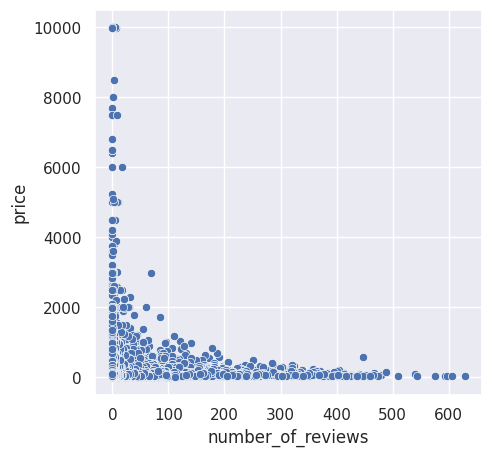

In [24]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="number_of_reviews", y="price", data=df)

<Axes: xlabel='latitude', ylabel='price'>

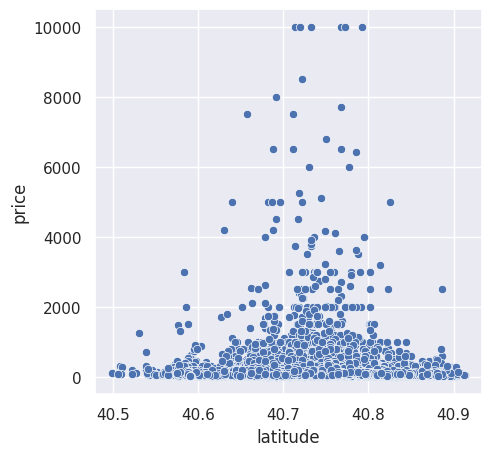

In [25]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="latitude", y="price", data=df)

<Axes: xlabel='availability_365', ylabel='price'>

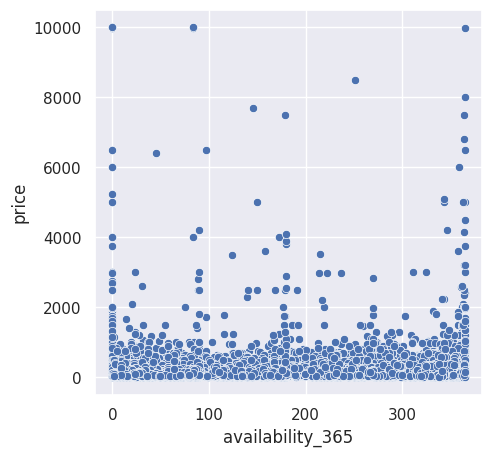

In [26]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="availability_365", y="price", data=df)

<ipython-input-27-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


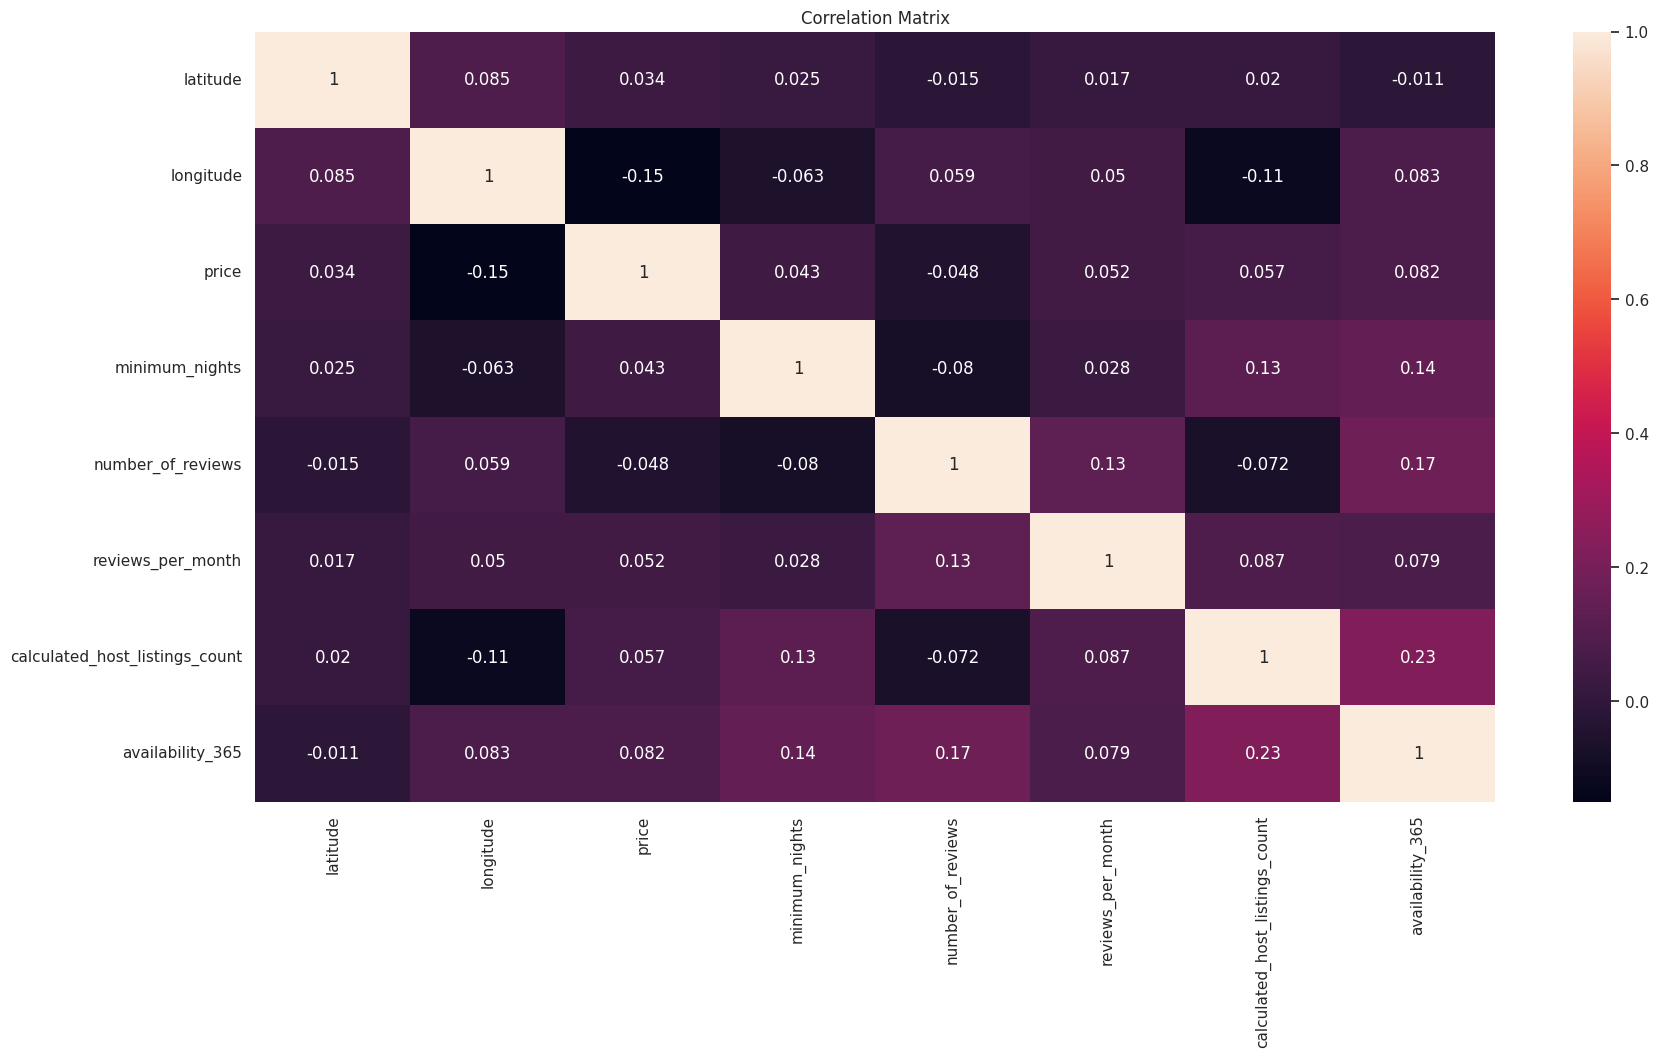

In [27]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);

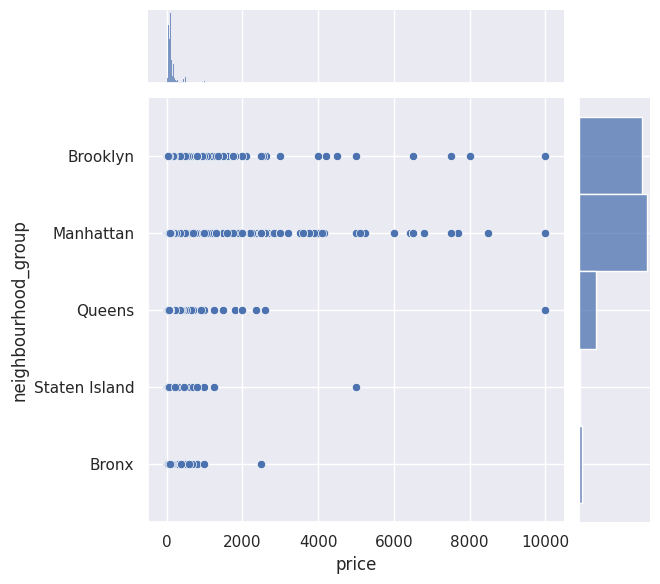

In [28]:
sns.jointplot(x="price", y=df["neighbourhood_group"], data=df)

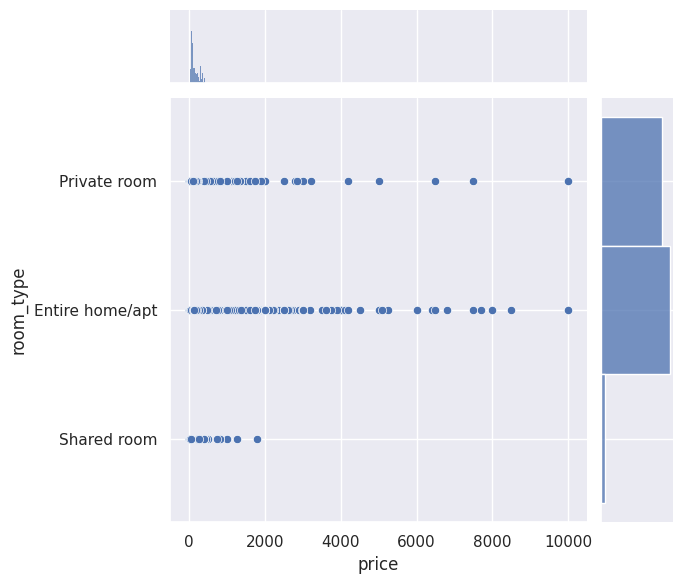

In [29]:
sns.jointplot(x="price", y=df["room_type"], data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


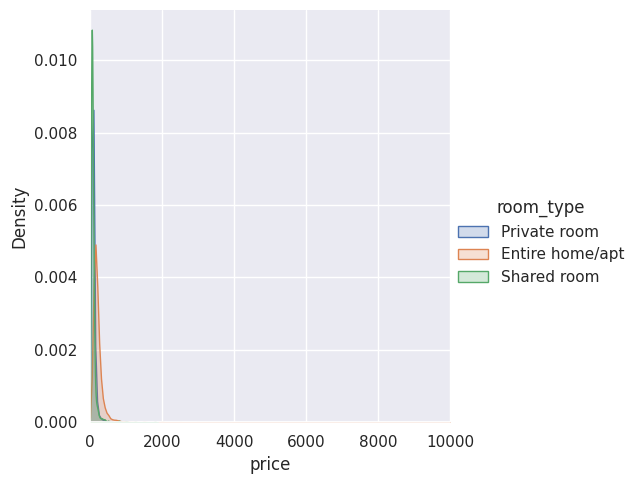

In [30]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend())

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

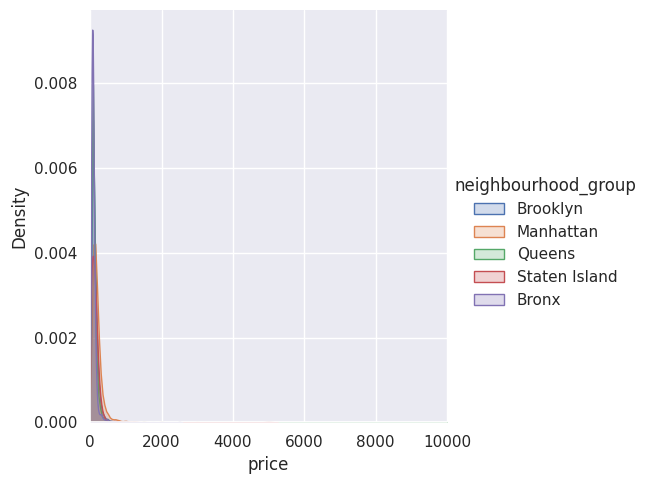

In [31]:
(sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend())

Text(0.5, 1.0, 'Neighbourhood Group - Price')

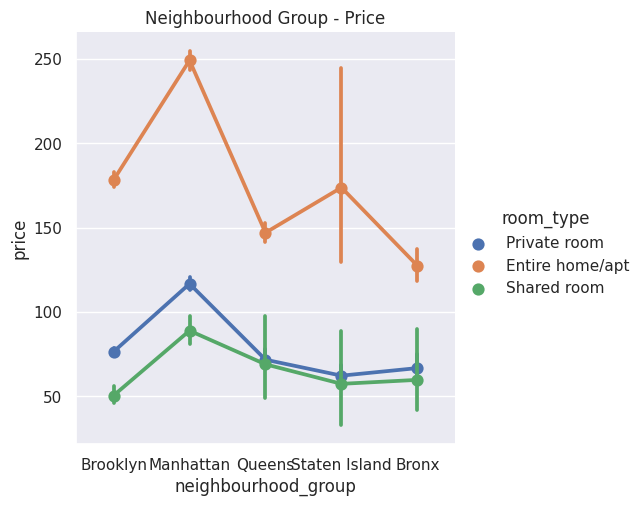

In [35]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=df)
plt.title("Neighbourhood Group - Price")